In [3]:
import matplotlib.pyplot as plt
import operator
import copy
import numpy as np

In [4]:
def getFileTab(f):
    fp = open(f,'r')
    line = fp.readline()
    d = dict()
    i = 0
    while line:
        if not('R' in line):
            comb,val = line.split(" ") 
            d[comb]=int(val[:-1])
        line = fp.readline()
    fp.close()
    return d

In [5]:
dic = getFileTab("ResultatEval8.txt")
dic

{'0/0/0/8': 0,
 '0/0/1/7': 5,
 '0/0/2/6': 8,
 '0/0/3/5': 17,
 '0/0/4/4': 18,
 '0/0/5/3': 22,
 '0/0/6/2': 19,
 '0/0/7/1': 21,
 '0/0/8/0': 28,
 '0/1/0/7': 22,
 '0/1/1/6': 26,
 '0/1/2/5': 23,
 '0/1/3/4': 31,
 '0/1/4/3': 32,
 '0/1/5/2': 36,
 '0/1/6/1': 29,
 '0/1/7/0': 29,
 '0/2/0/6': 28,
 '0/2/1/5': 29,
 '0/2/2/4': 37,
 '0/2/3/3': 43,
 '0/2/4/2': 32,
 '0/2/5/1': 30,
 '0/2/6/0': 22,
 '0/3/0/5': 31,
 '0/3/1/4': 29,
 '0/3/2/3': 21,
 '0/3/3/2': 31,
 '0/3/4/1': 33,
 '0/3/5/0': 22,
 '0/4/0/4': 41,
 '0/4/1/3': 41,
 '0/4/2/2': 33,
 '0/4/3/1': 20,
 '0/4/4/0': 15,
 '0/5/0/3': 40,
 '0/5/1/2': 39,
 '0/5/2/1': 32,
 '0/5/3/0': 15,
 '0/6/0/2': 30,
 '0/6/1/1': 10,
 '0/6/2/0': 9,
 '0/7/0/1': 23,
 '0/7/1/0': 4,
 '0/8/0/0': 1,
 '1/0/0/7': 0,
 '1/0/1/6': 7,
 '1/0/2/5': 8,
 '1/0/3/4': 17,
 '1/0/4/3': 23,
 '1/0/5/2': 22,
 '1/0/6/1': 25,
 '1/0/7/0': 26,
 '1/1/0/6': 16,
 '1/1/1/5': 29,
 '1/1/2/4': 28,
 '1/1/3/3': 33,
 '1/1/4/2': 27,
 '1/1/5/1': 28,
 '1/1/6/0': 24,
 '1/2/0/5': 28,
 '1/2/1/4': 28,
 '1/2/2/3': 39,
 

In [6]:
def creaHistArray(dic,nmax = 100):
    
    array = []
    ar=[]
    ab=[]
    ac=[]
    ah=[]
    score = []
    while (len(dic.keys())>0 and len(score) < nmax):
        maximum = max(dic, key=dic.get) 
        r,b,c,h = maximum.split("/")
        ar.append(int(r))
        ab.append(int(b))
        ac.append(int(c))
        ah.append(int(h))
        array.append(maximum)
        score.append(dic[maximum])
        del dic[maximum]
    return array,ar,ab,ac,ah,score

In [7]:
def histogram(dic,nmax=100):
    ar,r,b,c,h,s = creaHistArray(copy.deepcopy(dic),nmax)
    header = ['Random','Bas','Complet','Haut']
    
    X_AXIS = s

    plt.rc('font', serif='Helvetica Neue')
    plt.rc('text', usetex='false')
    plt.rcParams.update({'font.size': 40})

    fig = plt.gcf()
    fig.set_size_inches(20, 7)

    configs = r
    N = len(r)
    ind = np.arange(N)
    width = 0.8
    
    bars = np.add(r, b).tolist()
    bars1 = np.add(bars,c).tolist()

    p1 = plt.bar(ind, r, width, color='r')
    p2 = plt.bar(ind, b, width, bottom=r, color='b')
    p3 = plt.bar(ind, c, width, bottom=bars, color='g')
    p4 = plt.bar(ind, h, width, bottom=bars1, color='y')

    #plt.ylim([0,120])
    plt.yticks(fontsize=12)
    plt.ylabel("Arrangement", fontsize=20)
    plt.xticks(ind, X_AXIS, fontsize=12, rotation=90)
    plt.xlabel('Score de la coalition', fontsize=12)
    plt.legend((p1[0], p2[0], p3[0], p4[0]), (header[0], header[1], header[2], header[3]), fontsize=12, ncol=4, framealpha=0, fancybox=True)
    plt.show()

In [8]:
dic = getFileTab("ResultatEval14.txt")
histogram(dic)

FileNotFoundError: [Errno 2] No such file or directory: 'ResultatEval14.txt'

In [11]:
def allGraph(i,j,nmax=100):
    all_dic = dict()
    for k in range(i,j+1):
        dic = getFileTab("ResultatEval"+str(k)+".txt")
        all_dic[k]=dic
        histogram(dic,nmax)
    return all_dic

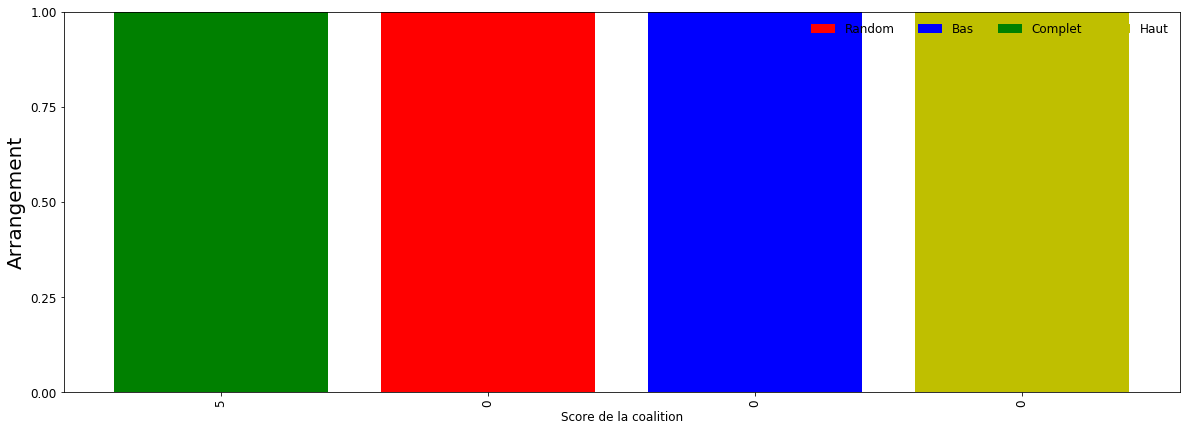

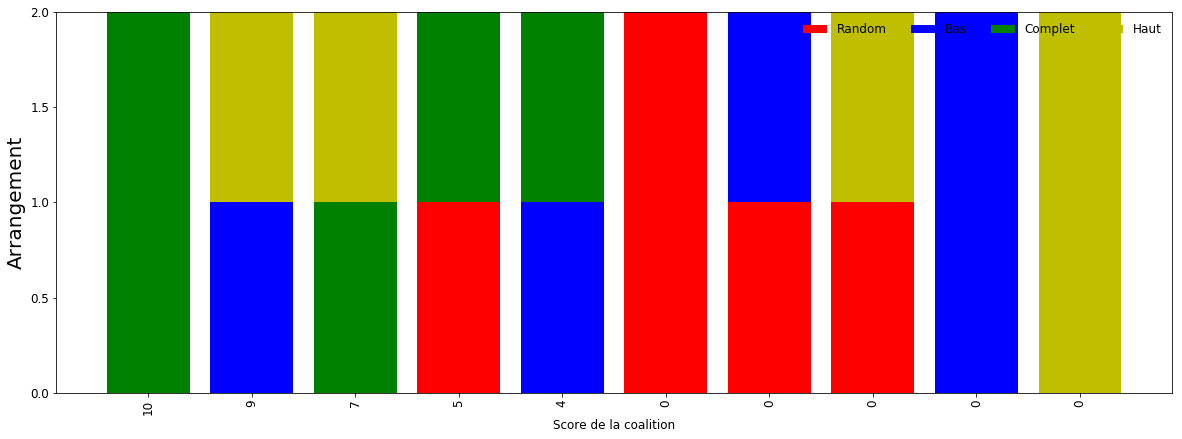

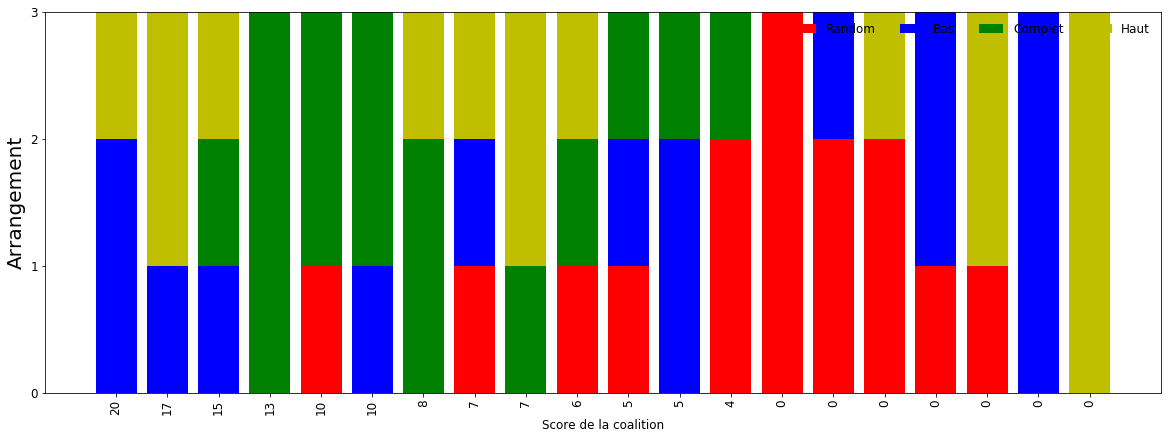

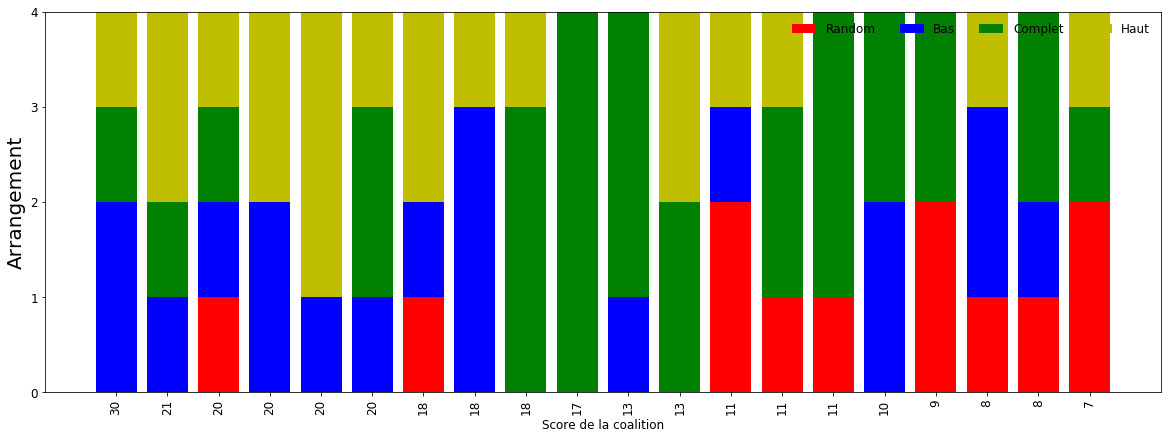

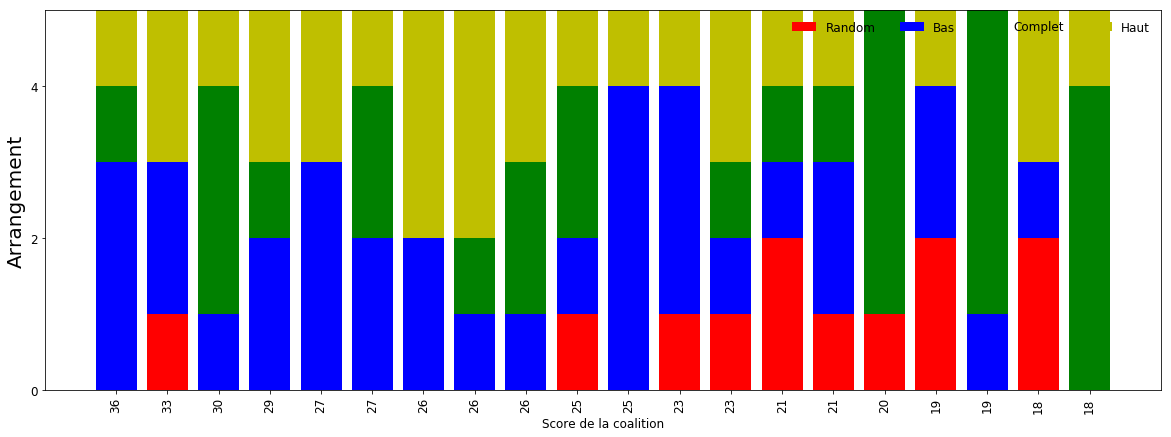

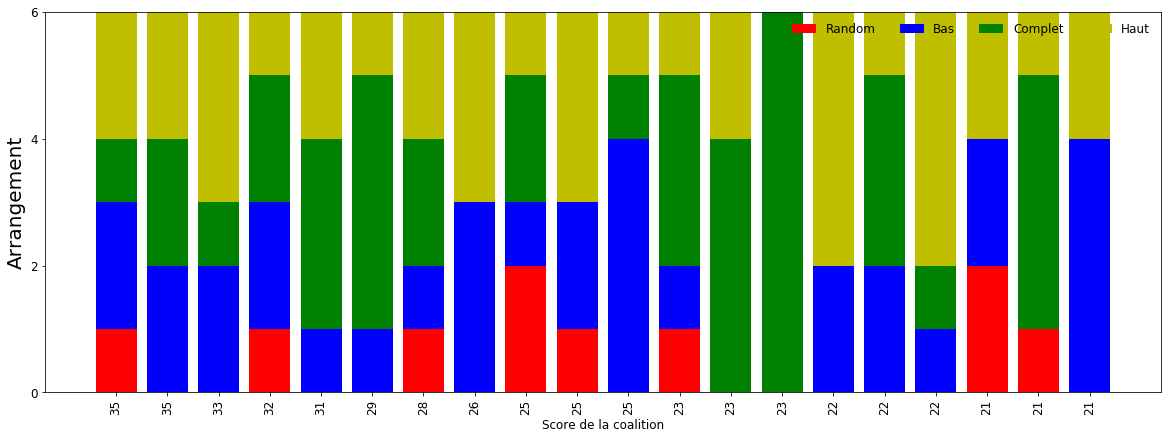

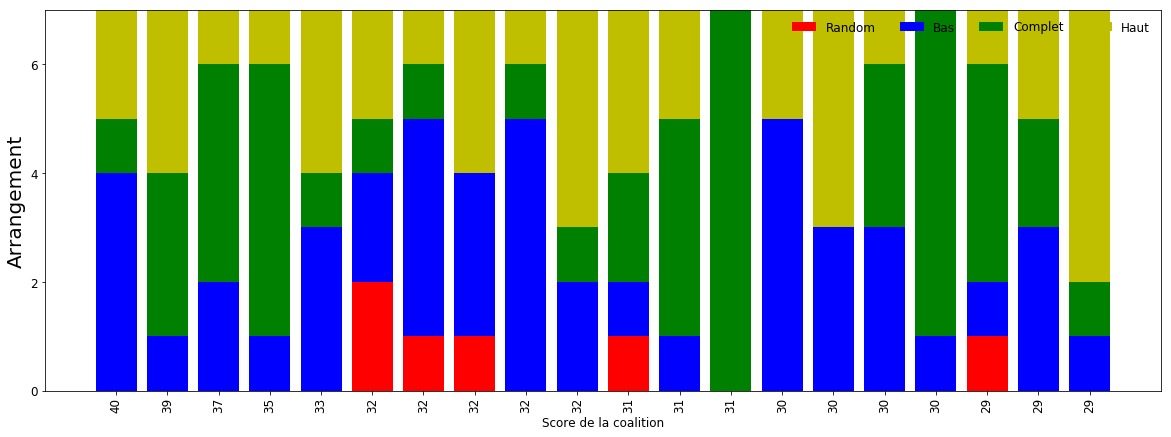

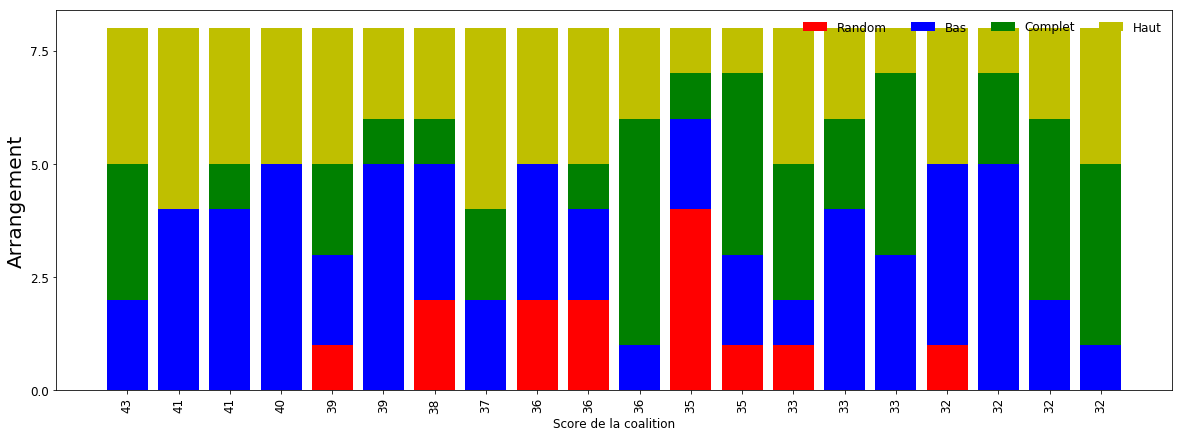

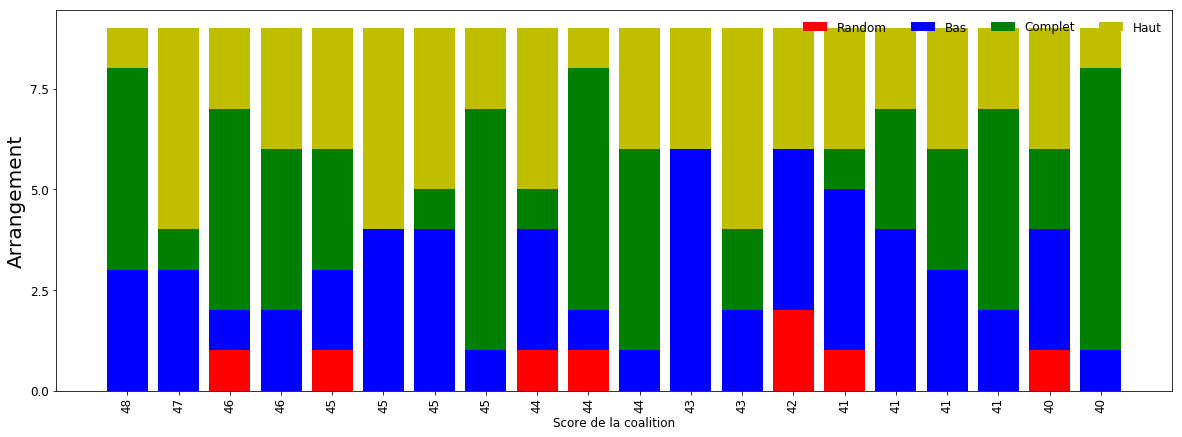

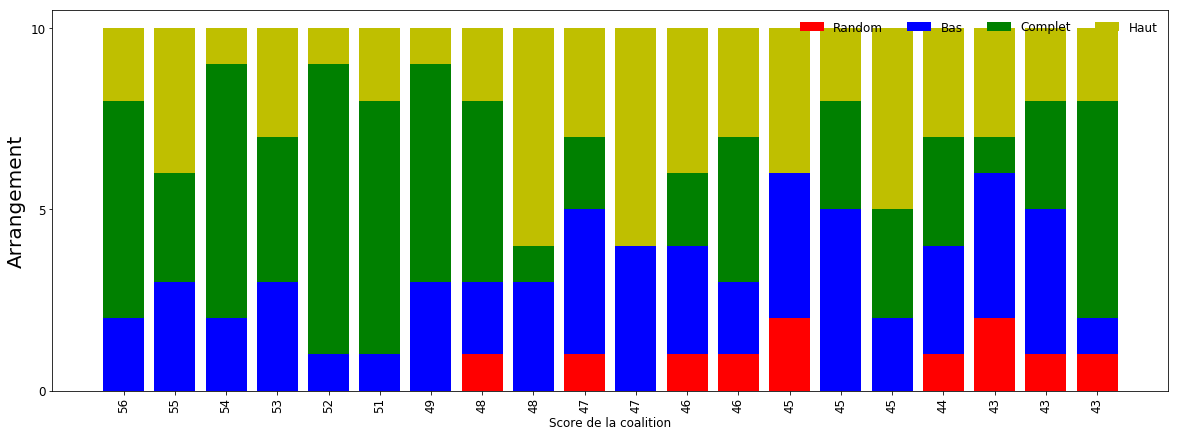

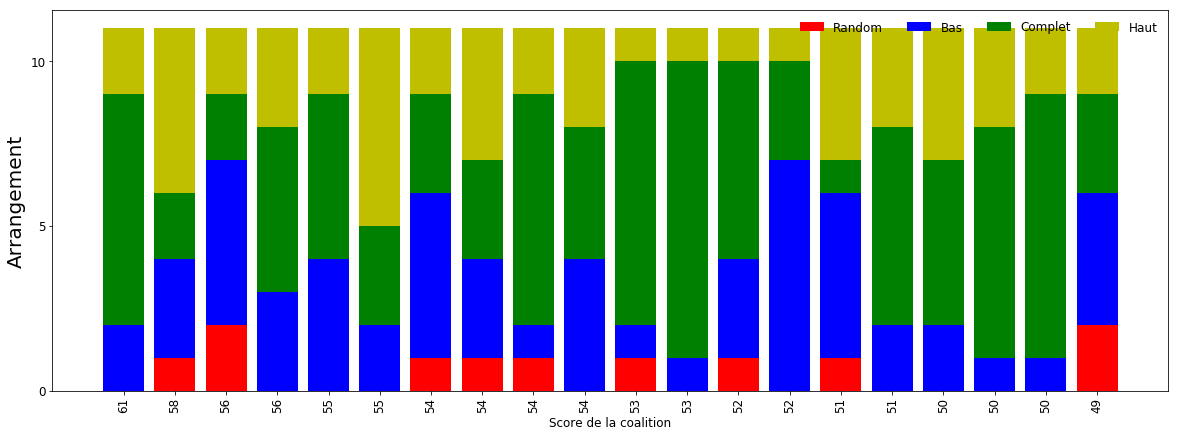

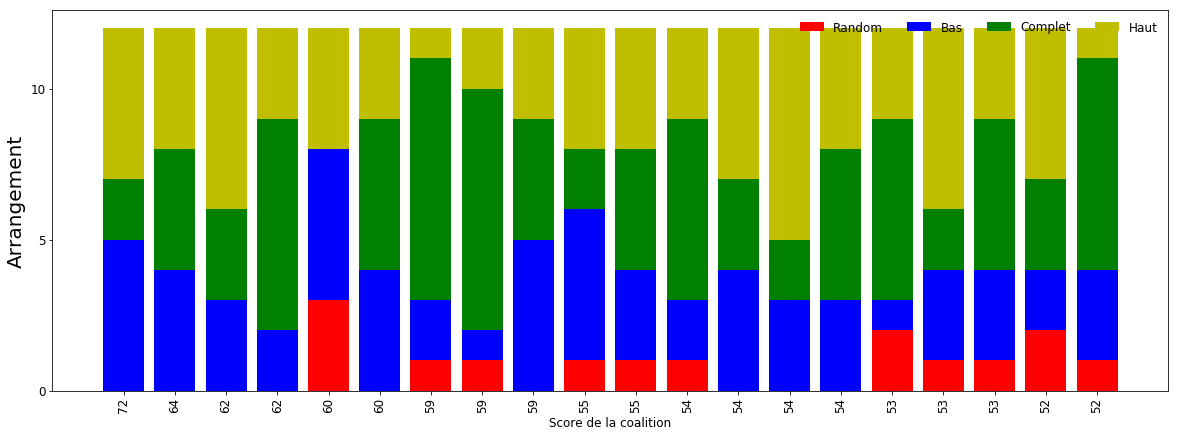

In [59]:
all_dic = allGraph(1,12,20)

In [46]:
def getCoalFromRatio(ratio,taille):
    "[0,0.25,0.5,0.25],8 -> '0/2/4/2'"
    r = []
    for i in ratio:
        r.append(int(i*taille))
    s = ""
    if(sum(r) != taille):
        return "None"
    for i in r:
        s+=(str(i)+'/')
    s=s[:-1]
    return s

In [25]:
def getRatioFromCoal(coal):
    """Coal : '0/2/4/2' -> [0,0.25,0.5,0.25]"""
    r = coal.split("/")
    ratio = []
    for i in range(0,len(r)):
        r[i] = int(r[i])
    total = sum(r)
    for i in r:
        ratio.append(i/total)
    return ratio

In [51]:
getCoalFromRatio(getRatioFromCoal('0/2/4/2'),6)

'None'

In [81]:
def findPositionCoal(coal,taille,all_dic,verbose = False):
    l = list(all_dic[taille].values())
    restaille = sorted(l)[::-1]
    r= restaille.index(all_dic[taille][coal])
    if(verbose):
        print(restaille)
        print(all_dic[taille][coal])
        print(r)
    return r

In [82]:

findPositionCoal('0/0/2/0',2,all_dic)

0

In [88]:
def getAllScoreFromRatio(ratio,all_dic):
    res=[]
    for i in range(1,13):
        coal = getCoalFromRatio(ratio,i)
        if(coal != 'None'):
            res.append((i,findPositionCoal(coal,i,all_dic)))
    return res

In [91]:
def getAllRatioFromSize(size,all_dic):
    ratio = []
    for i in all_dic[size].keys():
        ratio.append(getRatioFromCoal(i))
    return ratio

In [108]:
a= [1,2,3,4]
a[-1]

4

In [140]:
def evolutionOfCoal(all_dic,verbose=False):
    res = []
    for i in range(1,8):
        if(verbose):
            print("Size : "+str(i))
        ratio = getAllRatioFromSize(i,all_dic)
        for r in ratio:
            res.append((r,getAllScoreFromRatio(r,all_dic)))
            if(verbose):
                print("Evolution Ratio : "+str(r))
                print(res[-1])
                
    res_Taille=dict()
    for nbScore in range(1,13):
        
        best = []
        s=[]
        bestMoyenne = -1
        #print(res)

        for i in res:
            score = 0
            ra,scores = i
            if(len(scores)!=nbScore):
                continue
            for r in scores:
                taille,pos = r
                score+=pos
            score = score/len(scores)
            if(score<bestMoyenne or bestMoyenne == -1):
                best = ra
                bestMoyenne = score
                s=scores
        res_Taille[nbScore] = (best,bestMoyenne,s)
    return res_Taille

In [132]:
r=[0.0, 0.5714285714285714, 0.14285714285714285, 0.2857142857142857]
getAllScoreFromRatio(r,all_dic)

[(7, 0)]

In [141]:
evolutionOfCoal(all_dic)

{1: ([0.0, 0.5714285714285714, 0.14285714285714285, 0.2857142857142857],
  0.0,
  [(7, 0)]),
 2: ([0.0, 0.2, 0.6, 0.2], 1.0, [(5, 2), (10, 0)]),
 3: ([0.0, 0.25, 0.25, 0.5], 3.3333333333333335, [(4, 1), (8, 7), (12, 2)]),
 4: ([0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
  4.25,
  [(3, 2), (6, 0), (9, 14), (12, 1)]),
 5: ([], -1, []),
 6: ([0.0, 0.5, 0.0, 0.5],
  51.0,
  [(2, 1), (4, 2), (6, 7), (8, 1), (10, 129), (12, 166)]),
 7: ([], -1, []),
 8: ([], -1, []),
 9: ([], -1, []),
 10: ([], -1, []),
 11: ([], -1, []),
 12: ([0.0, 0.0, 1.0, 0.0],
  17.666666666666668,
  [(1, 0),
   (2, 0),
   (3, 3),
   (4, 9),
   (5, 20),
   (6, 11),
   (7, 10),
   (8, 37),
   (9, 22),
   (10, 30),
   (11, 47),
   (12, 23)])}

In [93]:
getAllRatioFromSize(2,all_dic)

[[1.0, 0.0, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0],
 [0.5, 0.0, 0.0, 0.5],
 [0.5, 0.0, 0.5, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.5, 0.0, 0.5],
 [0.0, 0.5, 0.5, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.5, 0.5],
 [0.0, 0.0, 1.0, 0.0]]

In [89]:
getAllScoreFromRatio([0,0.5,0,0.5],all_dic)

[(2, 1), (4, 2), (6, 7), (8, 1), (10, 129), (12, 166)]